In [1]:
!python --version

Python 3.10.1


In [2]:
# !pip install seaborn
# !pip install matplotlib
# !pip install python-math
# !pip install numpy
# !pip install pandas
# !pip install ipython
# !pip install more-itertools

In [4]:
# import lib
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', None)
from IPython.display import display_html
from itertools import chain, cycle
sns.set('paper') #  paper, notebook, talk, poster

In [3]:
pip list

Package              Version
-------------------- ---------
anyio                3.4.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
attrs                21.4.0
Babel                2.9.1
backcall             0.2.0
bleach               4.1.0
certifi              2021.10.8
cffi                 1.15.0
charset-normalizer   2.0.10
colorama             0.4.4
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
distlib              0.3.4
entrypoints          0.3
filelock             3.4.2
fonttools            4.28.5
idna                 3.3
ipykernel            6.6.1
ipython              7.31.0
ipython-genutils     0.2.0
jedi                 0.18.1
Jinja2               3.0.3
json5                0.9.6
Note: you may need to restart the kernel to use updated packages.
jsonschema           4.3.3
jupyter-client       7.1.0
jupyter-core         4.9.1
jupyter-server       1.13.1
jupyterlab           3.2.6
jupyterlab-pygments  0.1.2


In [5]:
# paths
staging = 'G:/My Drive/infolib/staging/'

In [6]:
# import file to pandas
df_01 = 'Chess_games_stats.csv'
df_02 = 'Conaf_Data_Chile_2017.csv'
df_03 = 'Student_Marks.csv'
df_04 = 'basic1.csv'
df_05 = 'data.csv'
df_06 = 'imdb_MOVIES.csv'
df_07 = 'xAPI_Edu_Data.csv'

# into pandas
df_01 = pd.read_csv(f'{staging}{df_01}', index_col=[0])
df_02 = pd.read_csv(f'{staging}{df_02}', index_col=[0])
df_03 = pd.read_csv(f'{staging}{df_03}', index_col=[0])
df_04 = pd.read_csv(f'{staging}{df_04}', index_col=[0])
df_05 = pd.read_csv(f'{staging}{df_05}', index_col=[0])
df_06 = pd.read_csv(f'{staging}{df_06}', index_col=[0])
df_07 = pd.read_csv(f'{staging}{df_07}', index_col=[0])

# csv
df_01_csv = f'{staging}{df_01}'
df_02_csv =f'{staging}{df_02}'
df_03_csv = f'{staging}{df_03}'
df_04_csv = f'{staging}{df_04}'
df_05_csv = f'{staging}{df_05}'
df_06_csv = f'{staging}{df_06}'
df_07_csv = f'{staging}{df_07}'

# list of dataframe
df_list=[df_01, df_02, df_03, df_04, df_05, df_06, df_07]

In [122]:
# infolib
def infolib(dataframe, series=None, target=None, plot=False, plot_as_type=None):
    def convert_size(size_bytes):
        if size_bytes == 0:
        return "0B"
        size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
        i = int(math.floor(math.log(size_bytes, 1024)))
        p = math.pow(1024, i)
        s = round(size_bytes / p, 2)
        return "%s %s" % (s, size_name[i])

  def get_df_name(dataframe):
    name =[x for x in globals() if globals()[x] is dataframe][0]
    return name
  
  def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4>{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th></br></br>'
    display_html(html_str,raw=True)
    return

  if isinstance(dataframe, pd.DataFrame)==False:
    print(f"This function expects PandasDataframe argument. {get_df_name(dataframe)} is not a valid argument.\nTry infolib(PandasDataframe) for info about {get_df_name(dataframe)} or infolib(PandasDataframe, 'column_name') for info about fature 'column_name in {get_df_name(dataframe)}'")
  else:
    if isinstance(dataframe, pd.DataFrame)==True and series is None:
      print(f'infolib(PandasDataFrame) for info about your DataFrame {get_df_name(dataframe)}')

      try:

          Df_desc = {'dataset': [], 'columns': [], 'rows': [], 'row_duplicate':[], 'row_unique':[], 'row_whitout_NaN': [], 'row_whit_NaN':[], 'memory_usage':[]}

          namedf=get_df_name(dataframe)
          Df_desc['dataset'].append(namedf)

          i=len(dataframe.columns)
          Df_desc['columns'].append(i)
          
          i=len(dataframe.index)
          Df_desc['rows'].append(i)
          
          i=len(dataframe.index)-len(dataframe.drop_duplicates())
          Df_desc['row_duplicate'].append(i)
          
          i=len(dataframe.index)-(len(dataframe.index)-len(dataframe.drop_duplicates()))
          Df_desc['row_unique'].append(i)
          
          i = len(dataframe.index)-(len(dataframe[dataframe.isna().any(axis=1)].index))
          Df_desc['row_whitout_NaN'].append(i)
          
          i = len(dataframe[dataframe.isna().any(axis=1)].index)
          Df_desc['row_whit_NaN'].append(i)

          i = dataframe.memory_usage(deep=True).sum()
          i=convert_size(i)
          Df_desc['memory_usage'].append(i)

          DataFrames=pd.DataFrame.from_dict(Df_desc, orient='columns')
          DataFrames=DataFrames.set_index('dataset')
          DataFrames.index.name = None

          Tot_desc_num = {'feature_name': [], 'dtypes': [], 'count_not_NaN': [], 'count_NaN': [], 'unique':[],
                      'mean':[], 'std':[], 'min':[], 'max':[], '25%':[], '50%':[], '75%':[]}
          Tot_desc_cat = {'feature_name': [], 'dtypes': [], 'count_not_NaN': [], 'count_NaN': [], 'unique':[],
                      'top':[], 'freq':[]}
            
          for i in dataframe.columns:
            
            a=dataframe[i].dtypes
            
            if a==int or a==float:
              Tot_desc_num['feature_name'].append(i)
              
              a=dataframe[i].dtypes
              Tot_desc_num['dtypes'].append(a)
              
              a=dataframe[i].count()
              Tot_desc_num['count_not_NaN'].append(a)
              
              a=dataframe[i].isna().sum()
              Tot_desc_num['count_NaN'].append(a)
              
              a = dataframe[i].nunique()
              Tot_desc_num['unique'].append(a)
              
              a=round(dataframe[i].mean(),3)
              Tot_desc_num['mean'].append(a)
              
              a=round(dataframe[i].std(),3)
              Tot_desc_num['std'].append(a)
              
              a=round(dataframe[i].min(),3)
              Tot_desc_num['min'].append(a)
              
              a=round(dataframe[i].max(),3)
              Tot_desc_num['max'].append(a)
              
              a=round(dataframe[i].quantile(0.25),3)
              Tot_desc_num['25%'].append(a)
              
              a=round(dataframe[i].quantile(0.5),3)
              Tot_desc_num['50%'].append(a)
              
              n=round(dataframe[i].quantile(0.75),3)
              Tot_desc_num['75%'].append(a)

            else:
              Tot_desc_cat['feature_name'].append(i)
              
              a=dataframe[i].dtypes
              Tot_desc_cat['dtypes'].append(a)
              
              a=dataframe[i].count()
              Tot_desc_cat['count_not_NaN'].append(a)
              
              a=dataframe[i].isna().sum()
              Tot_desc_cat['count_NaN'].append(a)
              
              a = dataframe[i].nunique()
              Tot_desc_cat['unique'].append(a)
              
              a=dataframe[i].value_counts().idxmax()
              Tot_desc_cat['top'].append(a)
              
              a=dataframe[i].value_counts()
              a=a.iloc[0]
              Tot_desc_cat['freq'].append(a)

          Numerical_Features=pd.DataFrame.from_dict(Tot_desc_num, orient='columns')
          Numerical_Features=Numerical_Features.set_index('feature_name')
          Numerical_Features.index.name = None

          Categorical_Features=pd.DataFrame.from_dict(Tot_desc_cat, orient='columns')
          Categorical_Features=Categorical_Features.set_index('feature_name')     
          Categorical_Features.index.name = None
          
          if not DataFrames.empty:
            if not Numerical_Features.empty:
              if not Categorical_Features.empty:
                display_side_by_side(DataFrames, Numerical_Features, Categorical_Features, titles=['DataFrame','Numeric Features', 'Categorical Features'])

          if not DataFrames.empty:
            if not Numerical_Features.empty:
              if Categorical_Features.empty:
                display_side_by_side(DataFrames, Numerical_Features, titles=['DataFrame','Numeric Features'])

          if not DataFrames.empty:
            if Numerical_Features.empty:
              if not Categorical_Features.empty:
                display_side_by_side(DataFrames, Categorical_Features, titles=['DataFrame', 'Categorical Features'])

      except:
      
        print(f'Error in your PandasDataframe')
        print(e)
    
    else:
      if isinstance(dataframe, pd.DataFrame)==True and isinstance(series, str)==True:
        var_desc_num = {'feature_name': [], 'dtypes': [], 'count': [], 'unique': [], 'NaN':[],
                      'mean':[], 'mode':[],'median':[], 'std':[], 'min':[], 'max':[], 'sample':[]}
        var_desc_cat = {'feature_name': [], 'dtypes': [], 'count_not_NaN': [], 'count_NaN': [], 'unique':[],
                      'top':[], 'freq':[],'sample':[]}
        a=dataframe[series].dtypes    
        if a == int or a == float: # num
          try:
            print(f'Qui numeriche')
            var_desc_num['feature_name'].append(series)

            var_desc_num['dtypes'].append(a)
            
            a=dataframe[series].count()
            var_desc_num['count'].append(a)
            
            a=dataframe[series].isna().sum()
            var_desc_num['NaN'].append(a)
            
            a = dataframe[series].nunique()
            var_desc_num['unique'].append(a)
            
            a=round(dataframe[series].mean(),3)
            var_desc_num['mean'].append(a)

            a=dataframe[series].mode()[0]
            var_desc_num['mode'].append(a)

            a=dataframe[series].median()
            var_desc_num['median'].append(a)
            
            a=round(dataframe[series].std(),3)
            var_desc_num['std'].append(a)
            
            a=round(dataframe[series].min(),3)
            var_desc_num['min'].append(a)
            
            a=round(dataframe[series].max(),3)
            var_desc_num['max'].append(a)
            
            a=dataframe[series].sample(1)[0]
            var_desc_num['sample'].append(a)
            





            var_desc_num=pd.DataFrame.from_dict(var_desc_num, orient='columns')
            var_desc_num=var_desc_num.set_index('feature_name')     
            var_desc_num.index.name = None
            display_side_by_side(var_desc_num, titles=[f'Feature Num.'])

            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(9,6), gridspec_kw= {"height_ratios": (0.2, 1)})
            plt.subplots_adjust(hspace=0.05)
            mean=dataframe[series].mean()
            median=dataframe[series].median()
            mode=dataframe[series].mode().values[0]

            sns.boxplot(data=dataframe, x=series, ax=ax_box)
            ax_box.axvline(mean, color='r', linestyle='--')
            ax_box.axvline(median, color='g', linestyle='-')
            ax_box.axvline(mode, color='b', linestyle='-')

            sns.histplot(data=dataframe, x=series, ax=ax_hist, kde=True)
            ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
            ax_hist.axvline(median, color='g', linestyle='-', label="Median")
            ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

            ax_hist.legend()

            ax_box.set(xlabel='')
            plt.show()


            

          except:
            print(f'Series is not in columns è dataframe giusto e series stringa ma non è una colonna del df')
        
        else: # cat
          
          try:
            print('qui categoriche')

            var_desc_cat['feature_name'].append(series)

            var_desc_cat['dtypes'].append(a)
            
            a=dataframe[series].count()
            var_desc_cat['count_not_NaN'].append(a)
            
            a=dataframe[series].isna().sum()
            var_desc_cat['count_NaN'].append(a)
            
            a = dataframe[series].nunique()
            var_desc_cat['unique'].append(a)
            
            a=dataframe[series].value_counts().idxmax()
            var_desc_cat['top'].append(a)

            a=dataframe[series].value_counts()
            a=a.iloc[0]
            var_desc_cat['freq'].append(a)

            a=dataframe[series].sample(1)[0]
            var_desc_cat['sample'].append(a)
 
            


            var_desc_cat=pd.DataFrame.from_dict(var_desc_cat, orient='columns')
            var_desc_cat=var_desc_cat.set_index('feature_name')     
            var_desc_cat.index.name = None
            display_side_by_side(var_desc_cat, titles=[f'Feature cat.'])


            # # titolo
            # # colonne: nome variabile, dtype, Unicode, count, unique, NaN, min, max, std, Mean, mode, mediana, sum, sample
            # # forse anche max len e min len!



            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(9,6), gridspec_kw= {"height_ratios": (0.2, 1)})
            plt.subplots_adjust(hspace=0.05)


            sns.boxplot(data=dataframe, x=series, ax=ax_box)


            sns.histplot(data=dataframe, x=series, ax=ax_hist, kde=True)


            ax_hist.legend()

            ax_box.set(xlabel='')
            plt.show()
          except:
            print(f'Series is not in columns è dataframe giusto e series stringa ma non è una colonna del df')
     
     
     
     
      else:
          print(f'Errore dataframe true ma str non è una stringa')

In [123]:
df_04[~df_04.isnull()]

,age,city,f1,f2,f3,f4,f5
id,,,,,,,
id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
id04,75.0,서울,NaN,2,NaN,INFP,52.667078
id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
id06,22.0,서울,57.0,0,vip,INTP,20.129444
id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
id08,38.0,서울,101.0,1,NaN,INFJ,83.685380
id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986


In [124]:
len(df_04.index)

100

In [125]:
len(df_04[df_04.isna().any(axis=1)].index)

96

In [126]:
len(df_04[df_04.isna().any(axis=1)].index) # row nan
len(df_04.index)-(len(df_04[df_04.isna().any(axis=1)].index)) # row no nan

4

In [127]:
df_04[df_04.isna().any(axis=1)]

,age,city,f1,f2,f3,f4,f5
id,,,,,,,
id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
id04,75.0,서울,NaN,2,NaN,INFP,52.667078
id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
id08,38.0,서울,101.0,1,NaN,INFJ,83.685380
id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
id10,95.0,서울,74.0,1,NaN,ISFP,98.429899


In [128]:
a=df_06['RATING'].dtype
if isinstance(a, int)==True or isinstance(a, float)==True:
    print('int or float')
else:
    print('not int or float')
    
if a==int or a== float:
    print('int or float')
else:
    print('not int or float')

a
# ==True or isinstance(a, float)==True:

not int or float
int or float


dtype('float64')

In [119]:
infolib(df_02)

infolib(PandasDataFrame) for info about your DataFrame df_02


DataFrame 
 
 
 
 columns 
 rows 
 row_duplicate 
 row_unique 
 row_whitout_NaN 
 row_whit_NaN 
 memory_usage 
 
 
 
 
 df_02 
 29 
 5234 
 0 
 5234 
 5234 
 0 
 2.97 MB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 count_not_NaN 
 count_NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 numero 
 float64 
 5234 
 0 
 1100 
 353.900 
 277.383 
 1.000 
 1117.00 
 126.000 
 289.000 
 289.000 
 
 
 utm_este 
 float64 
 5234 
 0 
 5148 
 508368.891 
 209721.431 
 224444.000 
 775622.00 
 278656.000 
 639198.500 
 639198.500 
 
 
 utm_norte 
 float64 
 5234 
 0 
 5164 
 6005835.643 
 292761.663 
 3981678.000 
 7952097.00 
 5834824.750 
 5944400.000 
 5944400.000 
 
 
 causa_gene 
 float64 
 5234 
 0 
 13 
 1.498 
 0.691 
 1.010 
 4.01 
 1.070 
 1.070 
 1.070 
 
 
 pino_0010 
 float64 
 5234 
 0 
 141 
 13.600 
 557.104 
 0.000 
 38354.42 
 0.000 
 0.000 
 0.000 
 
 
 pino_11_17 
 float64 
 5234 
 0 
 89 
 0.730 
 16.932 
 0.000 
 700.00 
 0.000 
 0.000 
 0.000 
 
 
 pino_18 
 float64 
 5234 
 0 
 143 
 29.221 
 1064.558 
 0.000 
 73619.12 
 0.000 
 0.000 
 0.000 
 
 
 eucalipto 
 float64 
 5234 
 0 
 218 
 9.275 
 165.960 
 0.000 
 7075.10 
 0.000 
 0.000 
 0.000 
 
 
 otras_plan 
 float64 
 5234 
 0 
 55 
 0.928 
 39.022 
 0.000 
 2732.14 
 0.000 
 0.000 
 0.000 
 
 
 total_plan 
 float64 
 5234 
 0 
 336 
 53.754 
 1750.271 
 0.000 
 119920.49 
 0.000 
 0.000 
 0.000 
 
 
 arbolado 
 float64 
 5234 
 0 
 227 
 17.242 
 354.556 
 0.000 
 20891.60 
 0.000 
 0.000 
 0.000 
 
 
 matorral 
 float64 
 5234 
 0 
 534 
 21.481 
 316.740 
 0.000 
 12938.70 
 0.000 
 0.070 
 0.070 
 
 
 pastizal 
 float64 
 5234 
 0 
 398 
 10.193 
 94.167 
 0.000 
 2463.00 
 0.000 
 0.010 
 0.010 
 
 
 total_veg 
 float64 
 5234 
 0 
 754 
 48.916 
 687.462 
 0.000 
 35842.26 
 0.020 
 0.265 
 0.265 
 
 
 agricola 
 float64 
 5234 
 0 
 84 
 5.489 
 143.727 
 0.000 
 7519.00 
 0.000 
 0.000 
 0.000 
 
 
 desechos 
 float64 
 5234 
 0 
 142 
 0.672 
 14.837 
 0.000 
 960.00 
 0.000 
 0.000 
 0.000 
 
 
 total_otra 
 float64 
 5234 
 0 
 194 
 6.161 
 144.488 
 0.000 
 7519.00 
 0.000 
 0.000 
 0.000 
 
 
 sup_t_a 
 float64 
 5234 
 0 
 868 
 108.831 
 2460.164 
 0.000 
 159812.58 
 0.090 
 0.500 
 0.500 
 
 
 long 
 float64 
 5234 
 0 
 5184 
 219835.962 
 67002.974 
 85984.043 
 476719.00 
 166869.462 
 218059.276 
 218059.276 
 
 
 lat 
 float64 
 5234 
 0 
 5197 
 6003468.066 
 294353.943 
 3981678.000 
 7952097.00 
 5826783.712 
 5940877.927 
 5940877.927 
 
 
 Categorical Features 
 
 
 
 dtypes 
 count_not_NaN 
 count_NaN 
 unique 
 top 
 freq 
 
 
 
 
 temporada 
 object 
 5234 
 0 
 1 
 2016-2017 
 5234 
 
 
 codreg 
 int64 
 5234 
 0 
 13 
 8 
 1946 
 
 
 codprov 
 int64 
 5234 
 0 
 43 
 81 
 500 
 
 
 codcom 
 int64 
 5234 
 0 
 263 
 8301 
 165 
 
 
 ambito 
 object 
 5234 
 0 
 2 
 Conaf 
 3583 
 
 
 nombre_inc 
 object 
 5234 
 0 
 3646 
 LOS ALAMOS Y SAN AMBROSIO 
 36 
 
 
 inicio_c 
 object 
 5234 
 0 
 74 
 Camino principal 
 2200 
 
 
 combus_i 
 object 
 5234 
 0 
 11 
 Pastizal 
 2493 
 
 
 causa_espe 
 object 
 5234 
 0 
 86 
 1.7.1. 
 1945

In [79]:
ea = df_04.memory_usage(deep=True).sum()
ea=convert_size(ea)
ea

NameError: name 'convert_size' is not defined

qui categoriche


,dtypes,count_not_NaN,count_NaN,unique,top,freq,sample
f4,object,100,0,16,ESTP,11,ESFP


Series is not in columns è dataframe giusto e series stringa ma non è una colonna del df


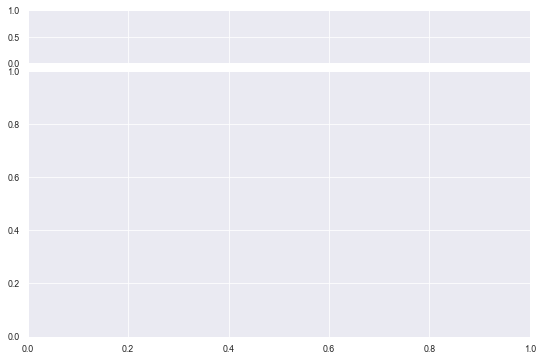

In [104]:
infolib(df_04, "f4")

In [118]:
df_04["age"].mode()[0]

75.0

In [104]:
a=df_02[['long', 'lat', 'temporada']]
b=df_02['long']
c=df_02['lat']
d=1
e='lat'
f='rut'

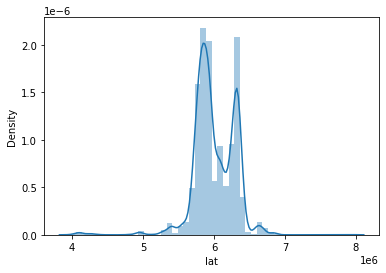

In [ ]:
# data = pd.DataFrame(data_set['mpg'])
sns.distplot(a[e], kde=True)